In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score


In [3]:
data = pd.read_csv(r"C:\Users\USER\Documents\ml zoomcamp\course_lead_scoring.csv")
df = data.copy()
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


### Data Preparation

In [4]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
categorical = ['lead_source', 'industry','employment_status', 'location']
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 
             'lead_score']

In [6]:
df[categorical] = df[categorical].fillna('NA')

df[numerical] = df[numerical].fillna(0)

In [7]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [8]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [9]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [10]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Question 1: ROC AUC feature importance

In [11]:
for col in numerical:
    print(col)
    score = roc_auc_score(y_train, df_train[col])
    if score < 0.5:
        score = -score
    else:
        score = score
    print( score)
    print()


number_of_courses_viewed
0.7635680590007088

annual_income
0.5519578313253012

interaction_count
0.738270176293409

lead_score
0.6144993577250176



`number_of_courses_viewed` is the  numerical variable with has the highest AUC

### Question 2: Training the model

In [94]:
def normal_predict(df_train, df_val):

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

In [110]:
y_val

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [12]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
# y_pred = normal_predict(df_train, df_val)
roc_auc_score(y_val, y_pred)

0.8171316268814112

This answer `0.817` fell in between the options `0.72` and `0.92`.
- Having read through some discussion about it in the slack channel, it was suggested that we standardize the x values or we changed the solver while fitting the model. I tried the two and changing the solver yielded higher roc_auc score and also closer to the option `0.92 

In [17]:
def solver_predict(df_train, df_val):

    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='newton-cg', C=1.0, max_iter=10000)
    model.fit(X_train, y_train)

    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]

    return y_pred

In [18]:

y_pred = solver_predict(df_train, df_val)
roc_auc_score(y_val, y_pred)

c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


0.9203815549803469

### Question 3: Precision and Recall

In [96]:
np.arange(0, 1.01, 0.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [19]:

y_pred = solver_predict(df_train, df_val)

scores = []

thresholds = np.arange(0, 1.01, 0.01)

for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']



c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


In [20]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [21]:
# df_scores[
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,171,122,0,0,0.583618,1.000000
10,0.1,168,93,3,29,0.643678,0.982456
20,0.2,165,68,6,54,0.708155,0.964912
30,0.3,164,49,7,73,0.769953,0.959064
40,0.4,157,32,14,90,0.830688,0.918129
50,0.5,152,24,19,98,0.863636,0.888889
60,0.6,143,16,28,106,0.899371,0.836257
70,0.7,135,11,36,111,0.924658,0.789474
80,0.8,124,7,47,115,0.946565,0.725146
90,0.9,98,6,73,116,0.942308,0.573099


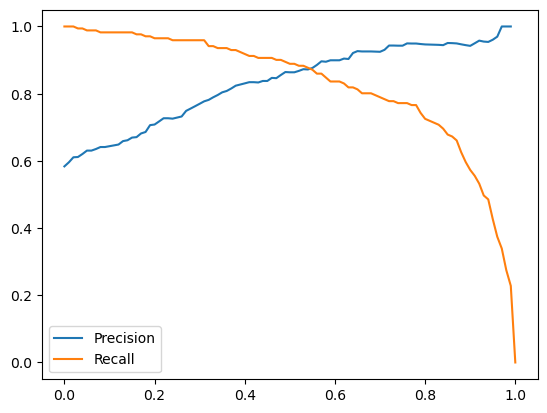

In [22]:
plt.plot(df_scores.threshold, df_scores.precision, label='Precision')
plt.plot(df_scores.threshold, df_scores.recall, label='Recall')
plt.legend()

Another problem encountered is that using the model whereby the solver was changed did not follow with the results again making me to revert to the original solver

This is more closer to the options `0.545`

### Question 4: F1 score

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

In [23]:
df_scores['f1_score'] = 2 * ((df_scores['precision'] * df_scores['recall']) / 
                             (df_scores['precision'] + df_scores['recall']))

In [24]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall,f1_score
0,0.00,171,122,0,0,0.583618,1.000000,0.737069
1,0.01,171,116,0,6,0.595819,1.000000,0.746725
2,0.02,171,109,0,13,0.610714,1.000000,0.758315
3,0.03,170,108,1,14,0.611511,0.994152,0.757238
4,0.04,170,104,1,18,0.620438,0.994152,0.764045
...,...,...,...,...,...,...,...,...
96,0.96,64,2,107,120,0.969697,0.374269,0.540084
97,0.97,58,0,113,122,1.000000,0.339181,0.506550
98,0.98,47,0,124,122,1.000000,0.274854,0.431193
99,0.99,39,0,132,122,1.000000,0.228070,0.371429


In [25]:
f1_max = df_scores['f1_score'].max()
df_scores[df_scores['f1_score'] == f1_max ]

,threshold,tp,fp,fn,tn,precision,recall,f1_score
49,0.49,153,24,18,98,0.864407,0.894737,0.87931


Answer is 0.54

### Question 5: 5-Fold CV

In [64]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)
    X = dv.transform(cat)
    model = LogisticRegression(solver='newton-cg')
    model.fit(X, y)
    return dv, model

In [65]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    return y_pred

In [26]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.converted.values
    y_val = df_val.converted.values
    y_pred = solver_predict(df_train, df_val)
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

print("std dev: ", np.std(aucs))

c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
c:\Users\USER

std dev:  0.010929732568421693


c:\Users\USER\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Answer is 0.006 ~ 3sf

In [28]:
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
aucs = []
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.converted.values
    y_val = df_val.converted.values

    del df_train['converted']
    del df_val['converted']
    
    dv = DictVectorizer(sparse=False)

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)

    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict_proba(X_val)[:, 1]
    # y_pred = normal_predict(df_train, df_val)
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

print("std dev: ", np.std(aucs))    


std dev:  0.03580711942905165


### Question 6: Hyperparameter Tuning

In [29]:
nfolds = 5

kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.000001, 0.001, 1]:
    aucs = []
    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx].reset_index(drop=True)
        df_val = df_full_train.iloc[val_idx].reset_index(drop=True)
        y_train = df_train.converted.values
        y_val = df_val.converted.values

        del df_train['converted']
        del df_val['converted']
    
        dv = DictVectorizer(sparse=False)

        train_dict = df_train[categorical + numerical].to_dict(orient='records')
        X_train = dv.fit_transform(train_dict)

        model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
        model.fit(X_train, y_train)

        val_dict = df_val[categorical + numerical].to_dict(orient='records')
        X_val = dv.transform(val_dict)

        y_pred = model.predict_proba(X_val)[:, 1]
        # y_pred = normal_predict(df_train, df_val)
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=1e-06, auc = 0.560 ± 0.024
C=0.001, auc = 0.867 ± 0.029
C=1, auc = 0.822 ± 0.036


Answer is 0.001